In [1]:
import sys
import os
path = os.path.abspath("../")
sys.path.append(path)
print(path)

/home/jovyan


In [ ]:
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np

import src.helpers.MetricUtilities as metrics
from src.data_processing.DatasetGetter import get_data, get_data_MStar, get_data_SARDet_100k

from id_estimator.PackingDimension import packing_dim

In [5]:
list_data = "/home/jovyan/data/ATRNet-STAR_annotations/list_data_all.npz"

data = np.load(list_data)
all_data = data["testSample"]

In [ ]:
import random

# sample_indices = np.array(random.sample(range(len(all_data), 10)))
sample_indices = np.array(random.sample(range(len(all_data)), 100))
# sample_indices = np.array(random.sample(range(len(entry)), left_len))
testSample = all_data[sample_indices]
# print(testSample.shape)

In [21]:
import random
IMDB_WIKI_data = get_data(128)
sample_indices = random.sample(range(len(IMDB_WIKI_data)), 100)
sampled_test_data = Subset(IMDB_WIKI_data, sample_indices)

testSample = np.array(sampled_test_data)

In [3]:
import random
data = get_data_MStar(128)
sample_indices = random.sample(range(len(data)), 100)
sampled_test_data = Subset(data, sample_indices)

testSample = np.array([item[0] for item in sampled_test_data])

In [14]:
import random
data = get_data_SARDet_100k(128)
sample_indices = random.sample(range(len(data)), 100)
sampled_test_data = Subset(data, sample_indices)

testSample = np.array([item[0] for item in sampled_test_data])

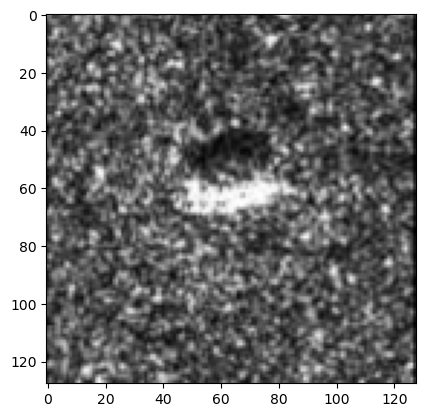

In [4]:
data = testSample[50]

plt.imshow(data, cmap="gray")
plt.show()

In [ ]:
r_1 = 0.1
r_2 = 0.15
epsilon = 0.01

D_pack = packing_dim(r_1, r_2, epsilon, testSample, metrics.dist_fft_numba)
print(D_pack)

# epsilon = 0.01
# for IMDB w average distancing r and epsilon 0.01... r1=0.35519913309165985, r2= r1 / 2,  ss=100, 2.06670927032519
# for MSTAR w average distancing r and epsilon 0.01... r1=0.2874618664410695, r2= r1 / 2,  ss=100, 0.924799078470416
# for SARDET w average distancing r and epsilon 0.01... r1=0.27816828240437047, r2= r1 / 2,  ss=100, 1.1172678641872351
# for ATRNET w average distancing r and epsilon 0.01... r1=0.11801859617485709, r2= r1 / 2,  ss=100, 1.4447639205568288


# IMDB epsilon=0.95, 0.3762601202257626, 3.2288575970384
# MSTAR 0.245971864754331, 1.1003957200143155
# SARDET 0.23582069057274893, 0.6553306229013383
# ATRNET 0.11826122486459371, 1.6479560136159335

# IMDB epsilon = 0.01, r1=0.366688015469522 again ss=100

# for IMDB 100 r1=0.2, r2=0.3, epsilon=0.01, 1.9178145789982848
# for ATRNET 100 r1=0.2, r2=0.3, epsilon=0.01, 2.709511291351456

# I should plot w consectuive values of a sequence of r plotted at halfway or smt like that... maybs the rs can be 0.05, 0.1, 0.15, 0.2, 0.25, 0.3

# for ATRNET 100 epsilon=0.01
# r_1=0.05, r_2=0.1 0.7951654750241648
# r_1=0.1, r_2=0.15 2.396874022214933
# r_1=0.15, r_2=0.2 3.8137837643096293
# r_1=0.2, r_2=0.25 7.1641061097411445
# r_1=0.25, r_2=0.3 3.860512940065676

# for IMDB 100 epsilon=0.01
# r_1=0.05, r_2=0.1 
# r_1=0.1, r_2=0.15 0.15505280747294337
# r_1=0.15, r_2=0.2 0.40399419654591423 
# r_1=0.2, r_2=0.25 1.0072751096835382
# r_1=0.25, r_2=0.3 2.4780407589364066


# for MSTAR 100 epsilon=0.01
# r_1=0.05, r_2=0.1 0.5007867959837168
# r_1=0.1, r_2=0.15 1.314569042515671
# r_1=0.15, r_2=0.2 1.290879923879451
# r_1=0.2, r_2=0.25 1.216679397667675
# r_1=0.25, r_2=0.3 1.3346942111177769

# for SARDET 100 epsilon=0.01
# r_1=0.05, r_2=0.1 0.6030105757858368
# r_1=0.1, r_2=0.15 0.5453030568753482
# r_1=0.15, r_2=0.2 0.3464960067694197
# r_1=0.2, r_2=0.25 0.4718318123282027
# r_1=0.25, r_2=0.3 1.0463287258879066

0.6443952414789809


In [ ]:
def calc_packings_imdb(r1, r2, epsilon):
    IMDB_WIKI_data = get_data(128)
    sample_indices = random.sample(range(len(IMDB_WIKI_data)), 100)
    sampled_test_data = Subset(IMDB_WIKI_data, sample_indices)

    testSample = np.array(sampled_test_data)

    return packing_dim(r1, r2, epsilon, testSample, metrics.dist_fft_numba)

def calc_packings_MSTAR(r1,r2,epsilon):
    data = get_data_MStar(128)
    sample_indices = random.sample(range(len(data)), 100)
    sampled_test_data = Subset(data, sample_indices)

    testSample = np.array([item[0] for item in sampled_test_data])

    return packing_dim(r1, r2, epsilon, testSample, metrics.dist_fft_numba)

def calc_packings_SARDET(r1,r2,epsilon):
    data = get_data_SARDet_100k(128)
    sample_indices = random.sample(range(len(data)), 100)
    sampled_test_data = Subset(data, sample_indices)

    testSample = np.array([item[0] for item in sampled_test_data])
    
    return packing_dim(r1, r2, epsilon, testSample, metrics.dist_fft_numba)

def calc_packings_ATRNET(r1,r2,epsilon):
    list_data = "/home/jovyan/data/ATRNet-STAR_annotations/list_data_all.npz"
    data = np.load(list_data)
    all_data = data["testSample"]
    sample_indices = np.array(random.sample(range(len(all_data)), 100))
    testSample = all_data[sample_indices]
    
    return packing_dim(r1, r2, epsilon, testSample, metrics.dist_fft_numba)

In [ ]:
def calc_packings(r=[], epsilon=0.01, runs=5, filename=""):
    avgs_ATRNET = []
    avgs_IMDB = []
    avgs_MSTAR = []
    avgs_SARDET = []

    for i in range(1, len(r)):
        avg_ATRNET = 0
        avg_IMDB = 0
        avg_MSTAR = 0
        avg_SARDET = 0
        for j in range(runs):
            avg_ATRNET += calc_packings_ATRNET(r[i-1],r[i],epsilon)
            avg_IMDB += calc_packings_imdb(r[i-1],r[i],epsilon)
            avg_MSTAR += calc_packings_MSTAR(r[i-1],r[i],epsilon)
            avg_SARDET += calc_packings_SARDET(r[i-1],r[i],epsilon)

        avg_ATRNET = avg_ATRNET / runs
        avg_IMDB = avg_IMDB / runs
        avg_MSTAR = avg_MSTAR / runs
        avg_SARDET = avg_SARDET / runs

        avgs_ATRNET.append(avg_ATRNET)
        avgs_IMDB.append(avg_IMDB)
        avgs_MSTAR.append(avg_MSTAR)
        avgs_SARDET.append(avg_SARDET)
    
    print(f"ATRNET: {avgs_ATRNET}")
    print(f"IMDB: {avgs_IMDB}")
    print(f"MSTAR: {avgs_MSTAR}")
    print(f"SARDET: {avgs_SARDET}")

    with open(filename, "w") as f:
        f.write(f"r: {r}\n")
        f.write(f"ATRNET: {avgs_ATRNET}\n")
        f.write(f"IMDB: {avgs_IMDB}\n")
        f.write(f"MSTAR: {avgs_MSTAR}\n")
        f.write(f"SARDET: {avgs_SARDET}")
